<a href="https://colab.research.google.com/github/archita912/CODSOFT/blob/main/Slaes_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependecies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [ ]:
# Loading the dataset from csv file to a Pandas Dataframe
SalesData_prediction = pd.read_csv('/content/advertising.csv')

In [ ]:
# first 5 rows of Dataframe
SalesData_prediction.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
SalesData_prediction.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
# Checking the No. of Rows and Column
SalesData_prediction.shape

(200, 4)

In [ ]:
# getting some information about the dataset
SalesData_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
SalesData_prediction.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data preprocessing

In [ ]:
# Check for null values
SalesData_prediction.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

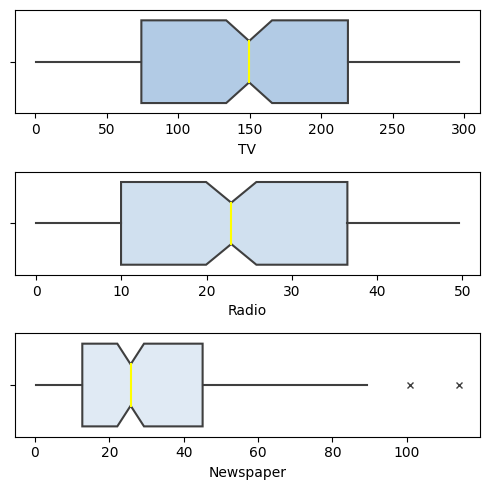

In [ ]:
# # detecting outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x = SalesData_prediction['TV'], ax = axs[0], notch = True, showcaps = False,
flierprops = {"marker": "x"},
boxprops = {"facecolor":(.4,.6,.8,.5)},
medianprops = {"color" : "yellow"})
plt2 = sns.boxplot(x = SalesData_prediction['Radio'], ax = axs[1], notch = True, showcaps = False,
flierprops = {"marker": "x"},
boxprops = {"facecolor":(.4,.6,.8,.3)},
medianprops = {"color" : "yellow"})
plt3 = sns.boxplot(x = SalesData_prediction['Newspaper'], ax = axs[2], notch = True, showcaps = False,
flierprops = {"marker": "x"},
boxprops = {"facecolor":(.4,.6,.8,.2)},
medianprops = {"color" : "yellow"})
plt.tight_layout()

In [ ]:
# We can see there are no sognificant outliers present in the data

EDA

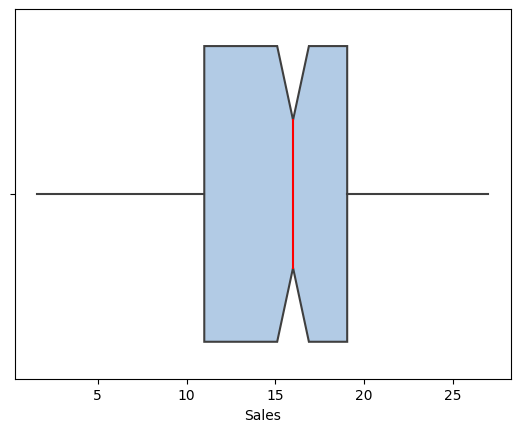

In [ ]:
# Target variable
sns.boxplot(x = SalesData_prediction['Sales'], notch = True, showcaps = False,
      flierprops = {"marker": "x"},
      boxprops = {"facecolor":(.4,.6,.8,.5)},
      medianprops = {"color" : "Red"})
plt.show()

In [ ]:
# Let's seperate the features and target variables
X = SalesData_prediction.drop(columns='Sales', axis=1)
Y = SalesData_prediction['Sales']

In [ ]:
# Now Seperating the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)
print(X_train.head())

        TV  Radio  Newspaper
159  131.7   18.4       34.6
62   239.3   15.5       27.3
166   17.9   37.6       21.6
45   175.1   22.5       31.5
23   228.3   16.9       26.2


In [ ]:
print(Y_train.head())

159    12.9
62     20.7
166     8.0
45     16.1
23     20.5
Name: Sales, dtype: float64


Model Building

In [ ]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


Evaluation

In [ ]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
# R Squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value =', r2_train)

R Squared Value = 0.9999998292519783


In [ ]:
# prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R Squared Value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Value =', r2_test)

R Squared Value = 0.946912303285763


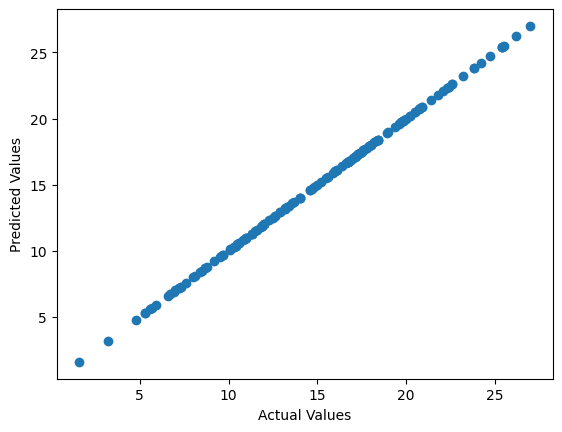

In [ ]:
# plotting the actual and predicted values
plt.scatter(Y_train,training_data_prediction )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

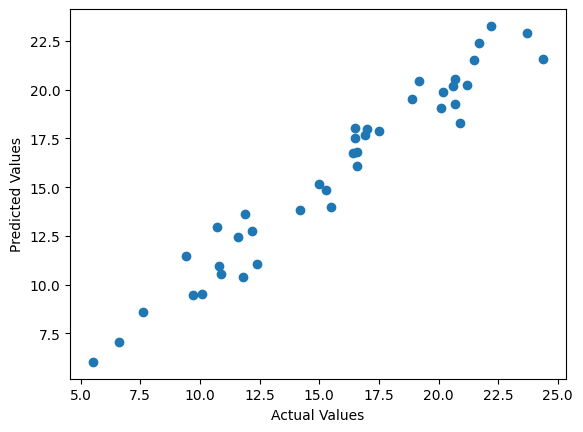

In [ ]:
# plottinh the actual and predicted values on test data
plt.scatter(Y_test,test_data_prediction )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()